# Analysis of DC VS RR


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the DataSets
data = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

# Removing duplicates

In [4]:
# Check for Duplicate Rows 
duplicated1=data.duplicated()
print(duplicated1.sum())
duplicated2=deliveries.duplicated()
print(duplicated2.sum())
deliveries.drop_duplicates(inplace=True)
print(duplicated2.sum())
deliveries.columns

0
0
0


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
# Check for Data Set Deliveries
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [6]:
# Check the Shape of both the CSV files

print('Rows and columns of Matches Data Set is',data.shape)
print('Rows and columns of Deliveries Data Set is',deliveries.shape)


Rows and columns of Matches Data Set is (756, 18)
Rows and columns of Deliveries Data Set is (179055, 21)


In [7]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
#Chek for Delivery info
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [9]:
# Make Delhi Daredevlis and Delhi Capitals Merge as Delhi Capitals
data.replace(to_replace = ['Delhi Daredevils']   , value = ['Delhi Capitals' ] , inplace = True)
deliveries.replace(to_replace = ['Delhi Daredevils'  ] , value = ['Delhi Capitals'], inplace = True)

In [134]:
# Check for Missing Values for Matches
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [138]:
# Check for Columns Where there is NULL Values first Check Winner there are 4 Rows as there is no Result we will put NUll values to 0
data[data['winner'].isnull()]
data['winner'].fillna('NoWinner', inplace=True)

In [140]:
# Check for Player_of_match as there is no Result put NULL values as NoPlayerMatch
data[data['player_of_match'].isnull()]
data['player_of_match'].fillna('NoPlayerMatch', inplace=True)

In [142]:
# Check for City there are 7 NULL values as City doest have significance for Analysis we will replace Null values to Unknow
data[data['city'].isnull()]
data['city'].fillna('Unknown', inplace=True)

In [143]:
# Check for Umpire 1 & Umpire 2 -- Putting Null value to some Umpire as this doesnt have significance
data[['umpire1','umpire2']].fillna('Unknown', inplace=True)

In [ ]:
# Umpire 3 has 637 Null Values and doesnt have much signifiance we will Drop this Columns from Dataframe
data=data.drop(['umpire3'],axis=1)


In [135]:
# Check for Missing values for Deliveries
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

# For Deliveries Dataframe we have NULL values for Player_dismissed,dismissial_kind,fielder as these can be remain intact as there is Wickets and player haven taken runs or it is a dot ball When Doing modelling we can cosndierd Null Values to replace some values

# Check for HeatMaps:
The Heat Map procedure shows the distribution of a quantitative variable over all combinations of 2 categorical factors. If one of the 2 factors represents time, then the evolution of the variable can be easily viewed using the map. A gradient color scale is used to represent the values of the quantitative variable. The correlation between two random variables is a number that runs from -1 through 0 to +1 and indicates a strong inverse relationship, no relationship, and a strong direct relationship, respectively.

<AxesSubplot:>

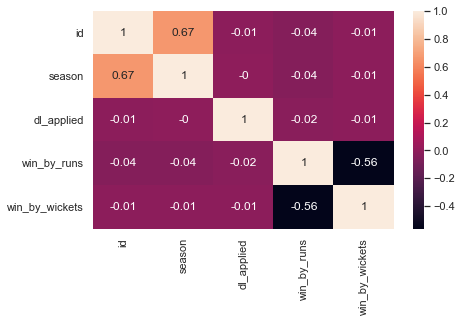

In [131]:
corelation_matrix=data.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

<AxesSubplot:>

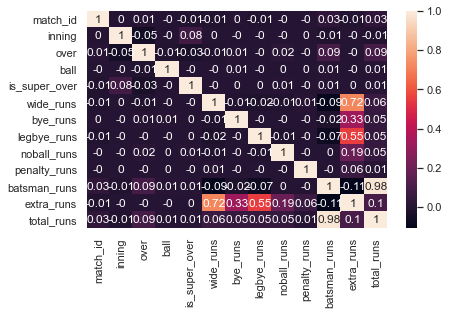

In [132]:
corelation_matrix=deliveries.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

# Wide_runs and extra_runs are highly corerealted ,When builiding Model we can remove one of the variable

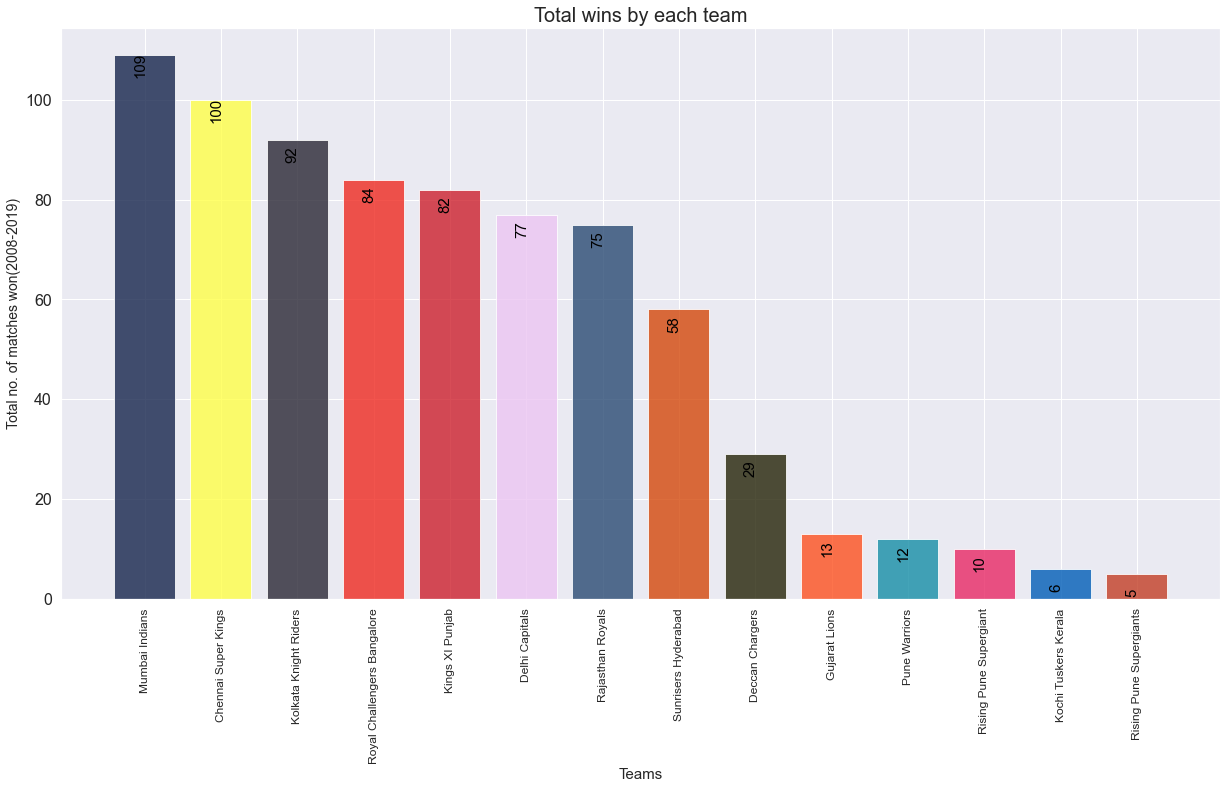

In [10]:
# Total no. of wins by each team
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

# MOM OF AWARDS

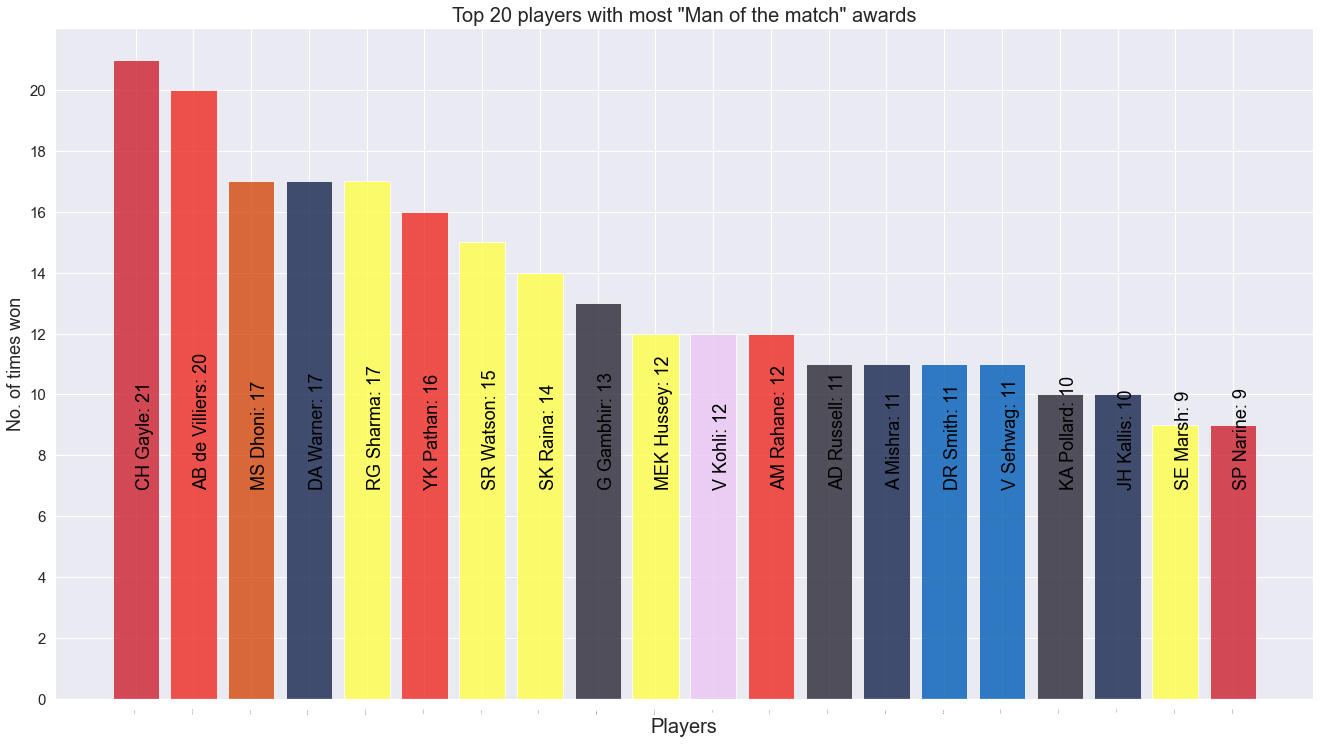

In [11]:
# Man of Match Awards
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()


In [12]:
# Filter out Data for DC & RR
dcrr=data[np.logical_or(np.logical_and(data['team1']=='Delhi Capitals',data['team2']=='Rajasthan Royals'),np.logical_and(data['team2']=='Delhi Capitals',data['team1']=='Rajasthan Royals'))]
# Combined for DC & RR
dcrr_d= deliveries[np.logical_or(np.logical_and(deliveries['batting_team']=='Delhi Capitals',deliveries['bowling_team']=='Rajasthan Royals'),np.logical_and(deliveries['bowling_team']=='Delhi Capitals',deliveries['batting_team']=='Rajasthan Royals'))]

In [14]:
# Check for any Duplicate Rows
duplicate = dcrr[dcrr.duplicated()]
duplicate
duplicate_D = dcrr_d[dcrr_d.duplicated()]
duplicate_D

Empty DataFrame
Columns: [match_id, inning, batting_team, bowling_team, over, ball, batsman, non_striker, bowler, is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs, extra_runs, total_runs, player_dismissed, dismissal_kind, fielder]
Index: []

[0 rows x 21 columns]

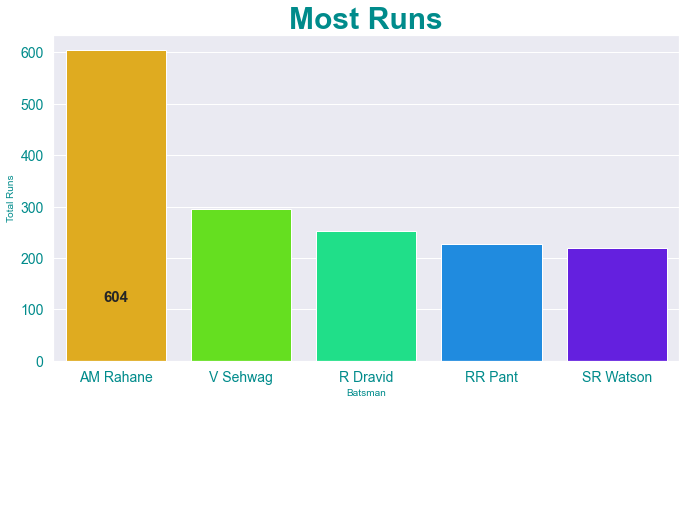

In [16]:
# Most Runs done by Players of both Teams DC & RR

#Create new dataframe
most_runs = pd.DataFrame()

#KKR_Runs=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
# From the 'deliveries' dataframe groupby rows based off 'batsman' column, perform sum on them, fetch only 
# the 'batsman_runs' column, sort them and fetch top 10 results
most_runs['Total Runs'] = dcrr_d.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(5)

#Give a name to the index and reset the index to make it a column
most_runs.index.names = ['Batsman']
most_runs.reset_index(inplace=True)

#Plot the graph
plt.figure(figsize=(10,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Runs',fontdict=font)
ax = sns.barplot(x='Batsman',y='Total Runs',data = most_runs,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-500), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)

# Most Wickets Taken by Player from both the Teams

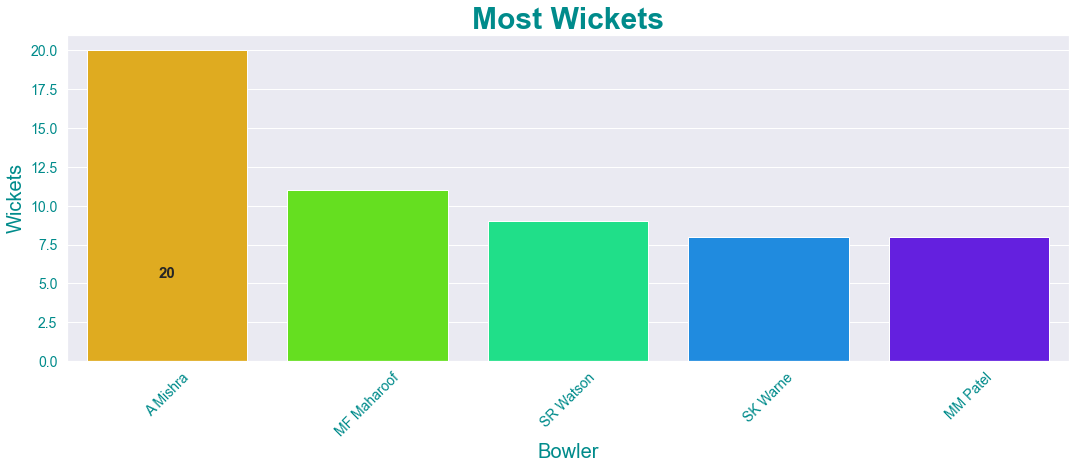

In [18]:
#the top Ten blower of DC & RR

#Create new dataframe
wickets = pd.DataFrame()
dismissal = pd.DataFrame()

dismissal = dcrr_d[(dcrr_d['player_dismissed'].notnull()) & (~dcrr_d['dismissal_kind'].isin(['run out','retired hurt','obstructing the field']))]
wickets['Wickets'] = dismissal.groupby('bowler').count()['player_dismissed'].sort_values(ascending=False).head(5)

#Give name to the index and reset the index to make it a column
wickets.index.names = ['Bowler']
wickets.reset_index(inplace=True)


#Plot the graph
plt.figure(figsize=(16,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Wickets',fontdict=font)
ax = sns.barplot(x='Bowler',y='Wickets',data = wickets,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)
plt.xticks(rotation=45)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-15), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)


# Head to Head between DC & RR 

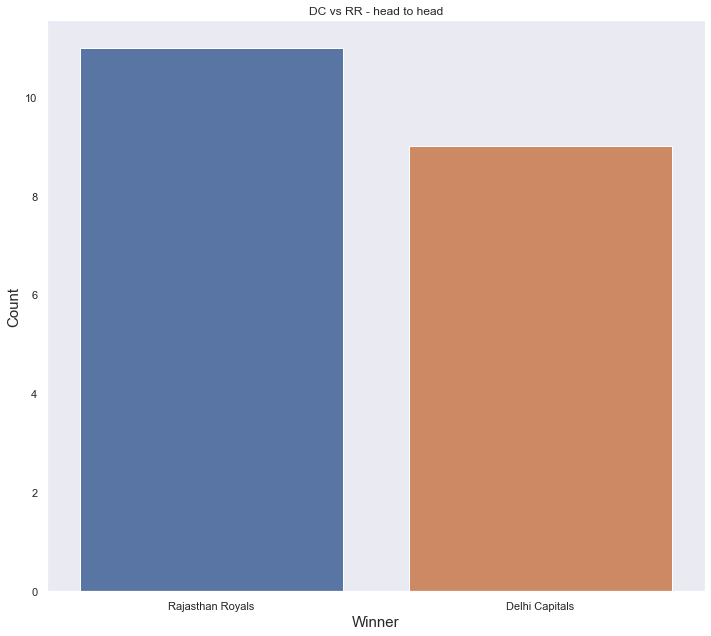

In [21]:
# DC VS RR head to head
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
sns.countplot(dcrr['winner'],order=dcrr['winner'].value_counts().index)
#plt.text(0.9,9,str(midc['winner'].value_counts()['Delhi Capitals']),size=29,color='white')
#plt.text(0.9,9,str(midc['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
#plt.yticks(fontsize=0)
plt.title('DC vs RR - head to head')
plt.show()

In [22]:
def win_visu_by_toss(team_name):
    datas = data[(data['toss_winner']==team_name) & (data['winner']==team_name)]
    count = datas['toss_decision'].value_counts()
    win_bat = count['bat']/(count['field']+count['bat'])*100
    win_field = count['field']/(count['bat']+count['field'])*100
    print("field_count = "+ str(count['field']))
    print("bat_count = " + str(count['bat']))
    print("Win %age if fielding is choosen = " + str(win_field))
    print("Win %age if batting is choosen = " + str(win_bat))
    print()
    print()
    data1 = [['Fielding', win_field], ['Batting', win_bat]]
    data1 = pd.DataFrame (data1,columns=['Decision','Win_%age'])
    return(px.pie( data1 , values= 'Win_%age' , names='Decision', title='Win %age For '+ team_name + ' for toss decision',color_discrete_sequence=px.colors.sequential.Rainbow))

            

In [23]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Delhi Capitals
field_count = 30
bat_count = 12
Win %age if fielding is choosen = 71.42857142857143
Win %age if batting is choosen = 28.57142857142857




In [24]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Rajasthan Royals
field_count = 27
bat_count = 15
Win %age if fielding is choosen = 64.28571428571429
Win %age if batting is choosen = 35.714285714285715




# RR has more Chances of Winning the Matches against DC if RR Won the toss and field First there is more Chance of Winning the Match

# Will See that Matches are Placed Outside India ,So to Check what is Record of Winning the Match Outside India i.e UAE

In [26]:
Venue =['MA Chidambaram Stadium, Chepauk',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sharjah Cricket Stadium', 'JSCA International Stadium Complex',
       'Maharashtra Cricket Association Stadium', 'Wankhede Stadium',
       'Rajiv Gandhi Intl. Cricket Stadium', 'M. A. Chidambaram Stadium']
# Only 1 venue is Outside India Where Currently match is currently Played lets See Percentage Of winning the Matches
UAE_Winner=dcrr.loc[dcrr['venue']=='Sharjah Cricket Stadium']
UAE_Winner['winner']


Series([], Name: winner, dtype: object)

# In UAE there is no match played between both the Teams

In [27]:
data[data['venue']=='Sharjah Cricket Stadium'].groupby('winner').count()['result']

winner
Chennai Super Kings            1
Delhi Capitals                 1
Kings XI Punjab                2
Kolkata Knight Riders          1
Royal Challengers Bangalore    1
Name: result, dtype: int64

# Delhi Capitals have played the match against different Team and have won in UAE

# Total Wickets falling in a Match

In [28]:
dismissed=dcrr_d[(dcrr_d['player_dismissed'].notnull())]

In [30]:
table=pd.pivot_table(dismissed,index=["match_id"],values=["player_dismissed"],aggfunc=[len])

In [96]:
table.head()

sum
              total_runs
match_id over           
5        1             9
         2             4
         3             8
         4            11
         5             5

In [38]:
Check=dismissed.groupby('match_id').count()['player_dismissed'].reset_index()
print('Average Wickets fallen in a Match between two teams RR vs DC',np.mean(Check['player_dismissed']))

Average Wickets fallen in a Match between two teams RR vs DC 11.25


# Average Wickets Fallen in Match Between two Teams is around ~11

# Total Wide for Both the Teams RR vs DC

In [39]:
# Check for Unique Values
dcrr_d['wide_runs'].unique()

array([0, 1, 2, 5, 3], dtype=int64)

# We have Unique values for Wides as 0,1,2,3,5 We have to Considerd only 1,2,3,5 and for 2,3,5 Also it Signifies Batsman has run for Extra run so We have to Filter out Records for 2,3,5 first

In [55]:
Wide_Runs=dcrr_d[dcrr_d['wide_runs'].isin(['1','2','3','5'])]
Wide_Check=Wide_Runs.groupby('match_id').count()['wide_runs'].reset_index()
print('Average Wides in a Match between two teams RR vs DC',np.mean(Wide_Check['wide_runs']))

Average Wides in a Match between two teams RR vs DC 7.3


# Average Wides in a Match between two teams RR vs DC 7

# So Team usually Gives 7 Wides across both the Teams

# Steve Smith Scores against DC 

In [97]:
# Check for Smith Name
deliveries[deliveries['batsman'].str.contains('Smith')].head()
# Check for Batsman Steve Smith
SPDSmith=dcrr_d[dcrr_d['batsman']=='SPD Smith']
SPDSmith_Runs= SPDSmith.groupby('match_id').sum()['batsman_runs'].reset_index()
print('Average Runs by SteveSmith against DC',np.mean(SPDSmith_Runs['batsman_runs']))

Average Runs by SteveSmith against DC 30.5


In [99]:
# Check how much Smith score Averege irrespective of DC
SPDSmith=deliveries[deliveries['batsman']=='SPD Smith']
SPDSmith_Runs= SPDSmith.groupby('match_id').sum()['batsman_runs'].reset_index()
print('Average Runs by SteveSmith ',np.mean(SPDSmith_Runs['batsman_runs']))

Average Runs by SteveSmith  28.430555555555557


# As per Data Smith Averages around 29 against all teams

# Average Runs by Smith against DC is ~31

In [93]:
# Total Runs in Power Play of DC against RR
import numpy as np
PP_DC=dcrr_d[dcrr_d['batting_team']=='Delhi Capitals']
df=PP_DC.groupby(['match_id','over']).sum()['total_runs'].reset_index()
df=df.loc[df['over'] <=6]
# Alternative Way to get Pivot Table for MatchID,Over
table=pd.pivot_table(PP_DC,index=['match_id','over'],values=["total_runs"],aggfunc=[sum])
df=df.groupby('match_id').sum()['total_runs'].reset_index()
print('Average PP Runs by DC against RR',np.mean(df['total_runs']))

Average PP Runs by DC against RR 47.65


In [95]:
# Just to Check What is Perfroamnce of PP of DC against other Teams
PP_DC=deliveries[deliveries['batting_team']=='Delhi Capitals']
df=PP_DC.groupby(['match_id','over']).sum()['total_runs'].reset_index()
df=df.loc[df['over'] <=6]
# Alternative Way to get Pivot Table for MatchID,Over
table=pd.pivot_table(PP_DC,index=['match_id','over'],values=["total_runs"],aggfunc=[sum])
df=df.groupby('match_id').sum()['total_runs'].reset_index()
print('Average PP Runs by DC against all other Teams',np.mean(df['total_runs']))

Average PP Runs by DC against all other Teams 46.52542372881356


In [ ]:
Average PP Runs by DC against RR 46.52542372881356

In [ ]:
# Opening Batsman for DC is Shikhar Dhawan and Prtihvi Shawh ,Check when these 2 Players play how much PP score run by DC

In [115]:
# Check for Dhawan & Shaw Names
#S Dhawan
# P Shaw
deliveries[deliveries['batsman'].str.contains('Shaw')].head()

match_id  inning    batting_team     bowling_team  over  ball batsman  \
155526      7915       2  Delhi Capitals  Kings XI Punjab     1     1  P Shaw   
155527      7915       2  Delhi Capitals  Kings XI Punjab     1     2  P Shaw   
155528      7915       2  Delhi Capitals  Kings XI Punjab     1     3  P Shaw   
155529      7915       2  Delhi Capitals  Kings XI Punjab     1     4  P Shaw   
155533      7915       2  Delhi Capitals  Kings XI Punjab     2     1  P Shaw   

       non_striker      bowler  is_super_over  ...  bye_runs  legbye_runs  \
155526   G Gambhir  AS Rajpoot              0  ...         0            0   
155527   G Gambhir  AS Rajpoot              0  ...         0            0   
155528   G Gambhir  AS Rajpoot              0  ...         0            0   
155529   G Gambhir  AS Rajpoot              0  ...         0            0   
155533   G Gambhir     BB Sran              0  ...         0            0   

        noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
155526            0             0             0           0           0   
155527            0             0             0           0           0   
155528            0             0             4           0           4   
155529            0             0             1           0           1   
155533            0             0             4           0           4   

        player_dismissed dismissal_kind fielder  
155526               NaN            NaN     NaN  
155527               NaN            NaN     NaN  
155528               NaN            NaN     NaN  
155529               NaN            NaN     NaN  
155533               NaN            NaN     NaN  

[5 rows x 21 columns]

In [127]:
PP_DC=deliveries[deliveries['batting_team']=='Delhi Capitals']
df=PP_DC.loc[(PP_DC['over'] <=6 )& (PP_DC['batsman']=='S Dhawan')  ]
df=df.groupby(['match_id','over']).sum()['total_runs'].reset_index()
df=df.groupby('match_id').sum()['total_runs'].reset_index()
print('Average PP Runs by DC against RR When Shikhar Dhawan Playing as Opener',np.mean(df['total_runs']))

Average PP Runs by DC against RR When Shikhar Dhawan Playing as Opener 16.5


In [128]:
# Check for P Shaw as Opener and check runs

PP_DC=deliveries[deliveries['batting_team']=='Delhi Capitals']
df=PP_DC.loc[(PP_DC['over'] <=6 )& (PP_DC['batsman']=='P Shaw')  ]
df=df.groupby(['match_id','over']).sum()['total_runs'].reset_index()
df=df.groupby('match_id').sum()['total_runs'].reset_index()
print('Average PP Runs by DC against RR When Shikhar Dhawan Playing as Opener',np.mean(df['total_runs']))

Average PP Runs by DC against RR When Shikhar Dhawan Playing as Opener 17.16


In [130]:
# Check if Both Play Together in Same Match as Opener
PP_DC=deliveries[deliveries['batting_team']=='Delhi Capitals']
df=PP_DC.loc[(PP_DC['over'] <=6 )& ((PP_DC['batsman']=='P Shaw') & (PP_DC['non_striker']=='S Dhawan')) | ((PP_DC['batsman']=='S Dhawan') & (PP_DC['non_striker']=='P Shaw'))  ]
df=df.groupby(['match_id','over']).sum()['total_runs'].reset_index()
df=df.groupby('match_id').sum()['total_runs'].reset_index()
print('Average PP Runs by DC against RR When Shikhar Dhawan & Shaw Playing Togehther as Opener',np.mean(df['total_runs']))


Average PP Runs by DC against RR When Shikhar Dhawan & Shaw Playing Togehther as Opener 26.5


# Average PP Runs by DC against RR When Shikhar Dhawan & Shaw Playing Togehther as Opener 26.5

# Average PP Runs by DC against RR When Shikhar Dhawan Playing as Opener 17.16

# Average PP Runs by DC against RR When Shikhar Dhawan Playing as Opener 16.5

# Average PP Runs by DC against RR 47.65

In [ ]:
# Conclusion as Per Data Provided
Q1)Which Team Will win the Match? DC
Q2)How Many Wides bowled in the Match?7 
Q3)How Many Runs will Smith Score?  32
Q4)How Many Wickets loose in this Match? 11
Q5)How Many Runs Scores totally in the PP for DC? 48